# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:14:57.040109: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:15:00.027772
2025-04-14 20:15:00.027772


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:14:55"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

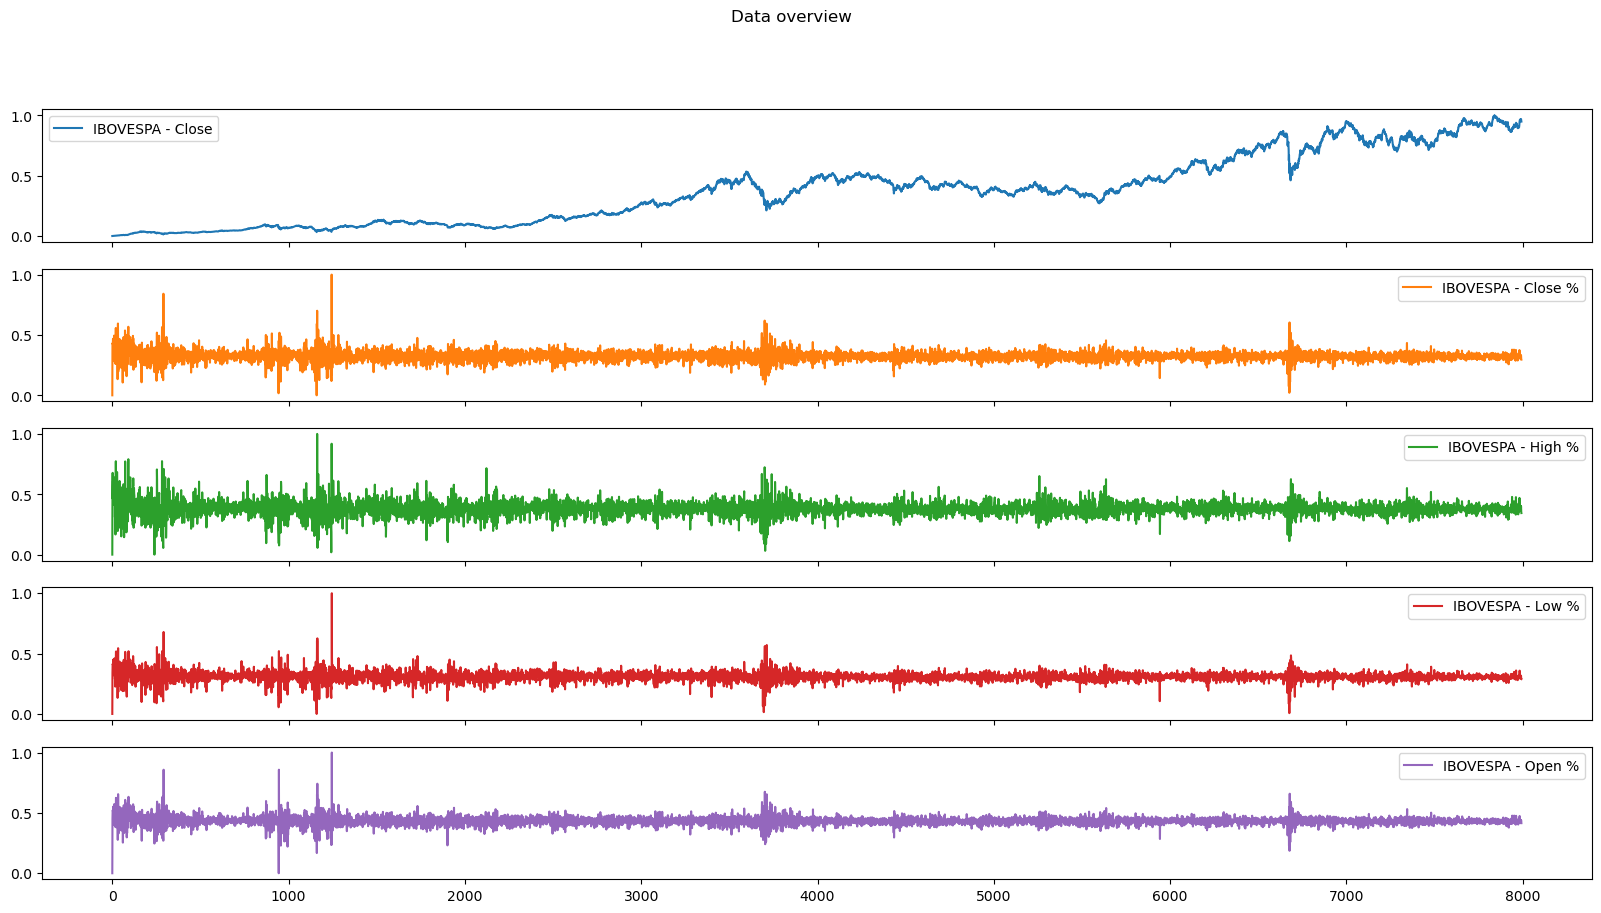

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

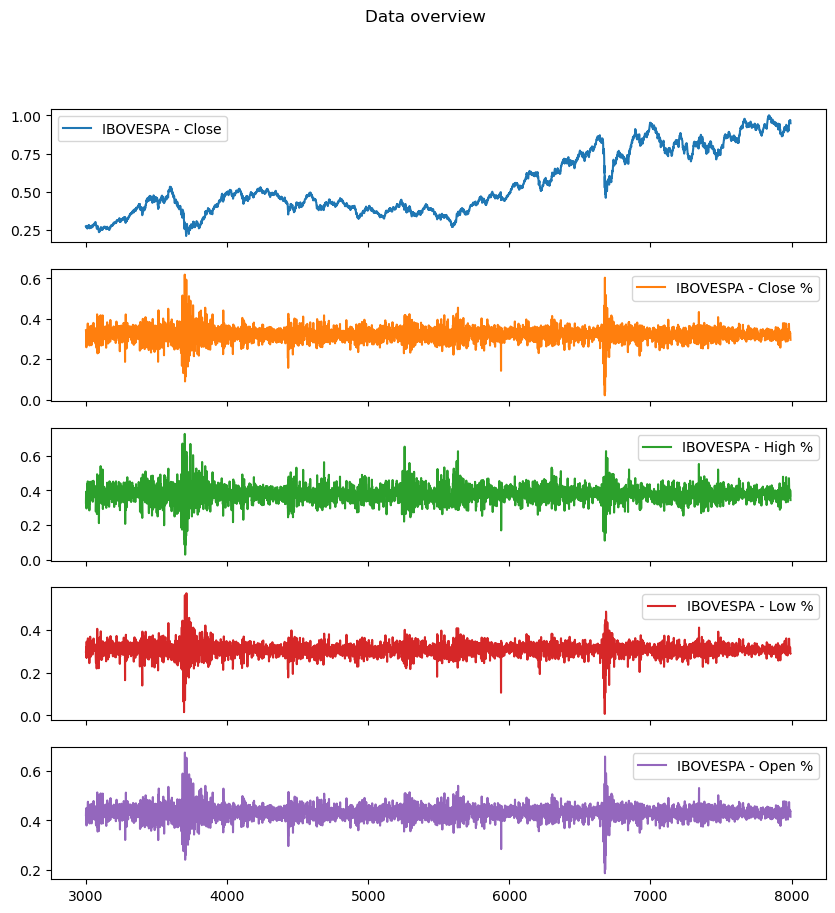

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

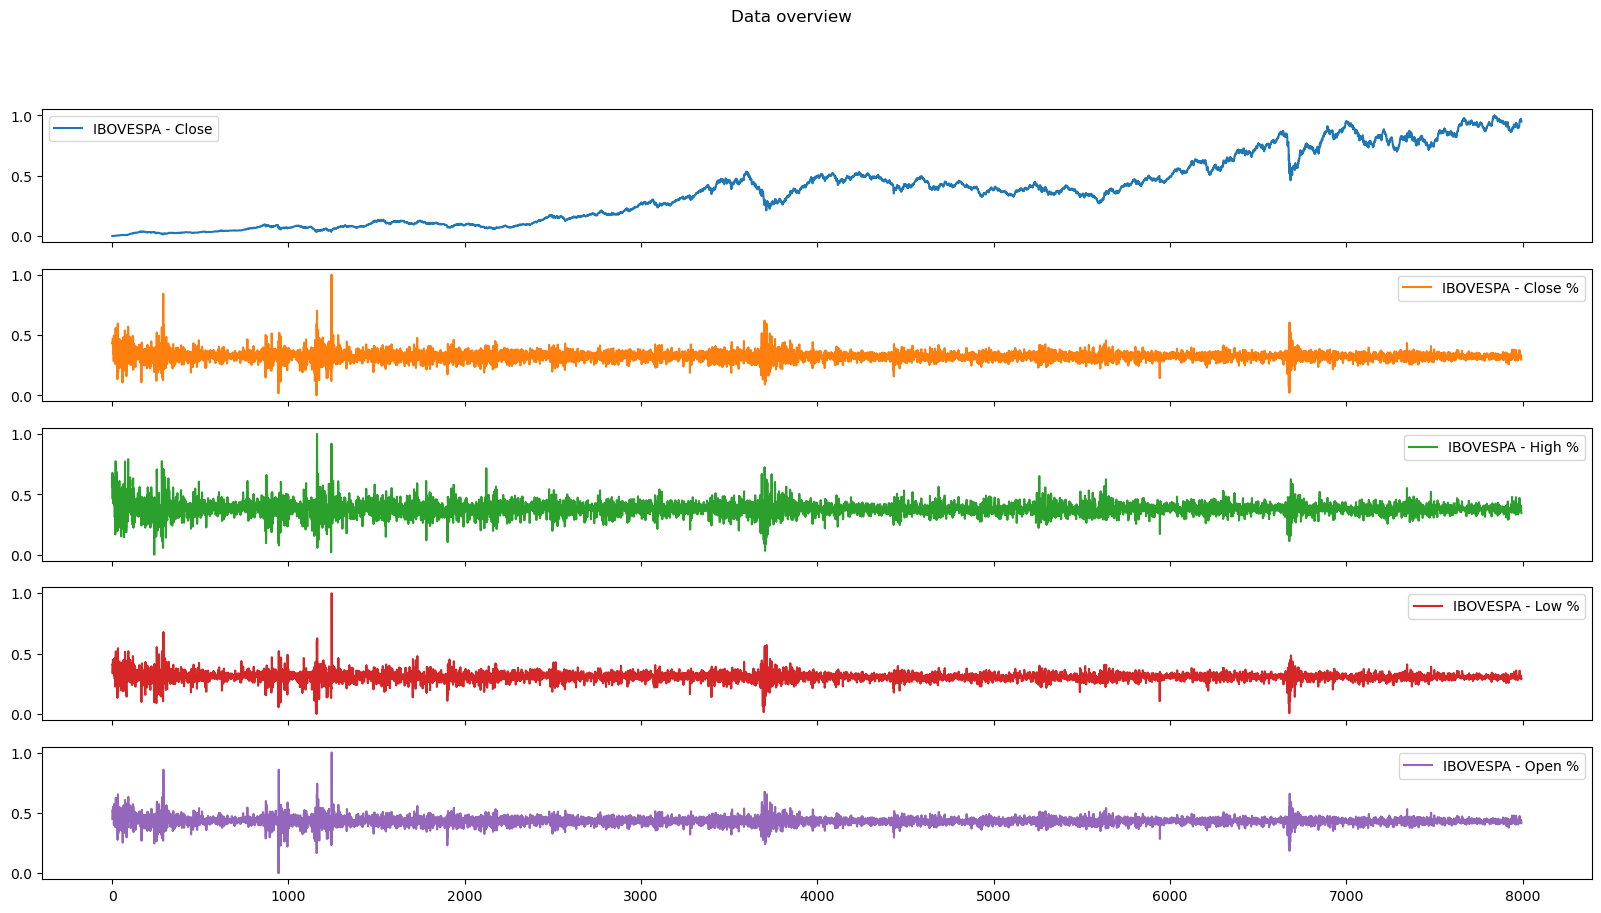

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

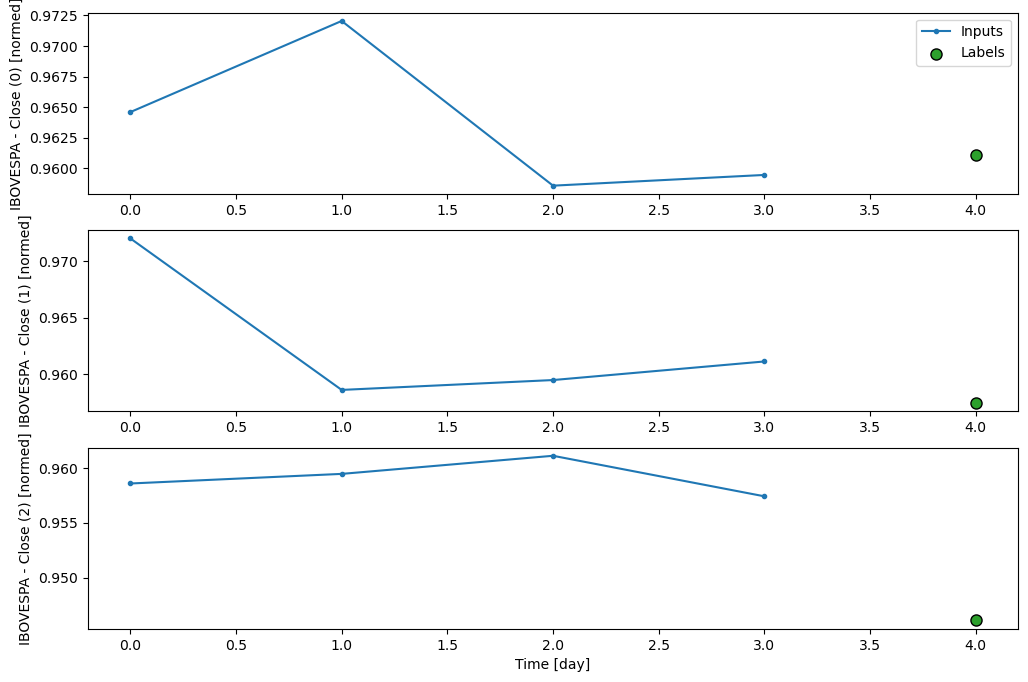

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8:36 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 151.5941 - mean_squared_error: 4.1318e-04 - root_mean_squared_error: 0.0195 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 119.3764 - mean_squared_error: 3.8122e-04 - root_mean_squared_error: 0.0191

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 100.5934 - mean_squared_error: 3.3565e-04 - root_mean_squared_error: 0.0179

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 86.8594 - mean_squared_error: 3.0656e-04 - root_mean_squared_error: 0.0171 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 78.5502 - mean_squared_error: 2.9687e-04 - root_mean_squared_error: 0.0169

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 71.5448 - mean_squared_error: 2.9703e-04 - root_mean_squared_error: 0.0170

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.4836 - mean_squared_error: 2.9486e-04 - root_mean_squared_error: 0.0169

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.5484 - mean_squared_error: 2.9942e-04 - root_mean_squared_error: 0.0171

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 59.4106 - mean_squared_error: 3.2374e-04 - root_mean_squared_error: 0.0177

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 56.3661 - mean_squared_error: 3.4774e-04 - root_mean_squared_error: 0.0183

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 54.0129 - mean_squared_error: 3.7979e-04 - root_mean_squared_error: 0.0191

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 51.9032 - mean_squared_error: 4.1183e-04 - root_mean_squared_error: 0.0198

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 50.1017 - mean_squared_error: 5.0953e-04 - root_mean_squared_error: 0.0214

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 48.4512 - mean_squared_error: 7.6076e-04 - root_mean_squared_error: 0.0244

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 47.1746 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0275    

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 45.8811 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 44.7958 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0329

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 43.6747 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0351

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 42.7348 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0369

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 41.7688 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0386

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 41.0504 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0399

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 40.3618 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0411

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 39.5482 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0426

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 38.8677 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0440

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 38.1464 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0455

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 37.7983 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0461 - val_loss: 0.1306 - val_mean_absolute_error: 0.1306 - val_mean_absolute_percentage_error: 13.9790 - val_mean_squared_error: 0.0183 - val_root_mean_squared_error: 0.1355 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.6861 - mean_absolute_error: 0.6861 - mean_absolute_percentage_error: 29629.6797 - mean_squared_error: 0.4708 - root_mean_squared_error: 0.6862

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6581 - mean_absolute_error: 0.6581 - mean_absolute_percentage_error: 12436.7959 - mean_squared_error: 0.4350 - root_mean_squared_error: 0.6591 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5832 - mean_absolute_error: 0.5832 - mean_absolute_percentage_error: 8711.9297 - mean_squared_error: 0.3657 - root_mean_squared_error: 0.6006 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5011 - mean_absolute_error: 0.5011 - mean_absolute_percentage_error: 6833.0054 - mean_squared_error: 0.3061 - root_mean_squared_error: 0.5439

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 5677.9678 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4994

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3916 - mean_absolute_error: 0.3916 - mean_absolute_percentage_error: 4888.6387 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4644

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 4255.4707 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4331

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3189 - mean_absolute_error: 0.3189 - mean_absolute_percentage_error: 3781.1418 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4076

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 3444.6665 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3882

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2735 - mean_absolute_error: 0.2735 - mean_absolute_percentage_error: 3140.9827 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3698

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 2914.2590 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3554

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 2701.3372 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3412

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 2537.1304 - mean_squared_error: 0.1285 - root_mean_squared_error: 0.3299

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2175 - mean_absolute_error: 0.2175 - mean_absolute_percentage_error: 2378.8630 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3189

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 2254.0276 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3099

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 2142.8613 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.3017

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 2043.1835 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2942

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 1953.2227 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2873

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 1871.5830 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2808

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - mean_absolute_percentage_error: 1789.2588 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2742

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1697 - mean_absolute_error: 0.1697 - mean_absolute_percentage_error: 1721.7090 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2686

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 1652.9713 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2629

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 1596.0802 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2581

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1565 - mean_absolute_error: 0.1565 - mean_absolute_percentage_error: 1537.7217 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2532

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 1489.0763 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2491

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 1438.8412 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2447

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1419.7848 - mean_squared_error: 0.0752 - root_mean_squared_error: 0.2431 - val_loss: 0.1130 - val_mean_absolute_error: 0.1130 - val_mean_absolute_percentage_error: 12.0847 - val_mean_squared_error: 0.0139 - val_root_mean_squared_error: 0.1179 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5956 - mean_absolute_error: 0.5956 - mean_absolute_percentage_error: 25728.2461 - mean_squared_error: 0.3548 - root_mean_squared_error: 0.5957

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5787 - mean_absolute_error: 0.5787 - mean_absolute_percentage_error: 10819.2881 - mean_squared_error: 0.3355 - root_mean_squared_error: 0.5790 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5472 - mean_absolute_error: 0.5472 - mean_absolute_percentage_error: 7708.3838 - mean_squared_error: 0.3041 - root_mean_squared_error: 0.5503 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4972 - mean_absolute_error: 0.4972 - mean_absolute_percentage_error: 6140.7368 - mean_squared_error: 0.2664 - root_mean_squared_error: 0.5122

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4480 - mean_absolute_error: 0.4480 - mean_absolute_percentage_error: 5149.4888 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4772

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 4459.6880 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4477

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3679 - mean_absolute_error: 0.3679 - mean_absolute_percentage_error: 3899.9150 - mean_squared_error: 0.1877 - root_mean_squared_error: 0.4204

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3395 - mean_absolute_error: 0.3395 - mean_absolute_percentage_error: 3514.7673 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3997

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 3175.3286 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3800

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 2926.7163 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3646

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 2717.9565 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3510

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 2539.8340 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3389

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 2370.0364 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3269

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2356 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 2237.4695 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3172

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 2108.3037 - mean_squared_error: 0.1092 - root_mean_squared_error: 0.3076

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 2005.4021 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2997

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 1913.0609 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2925

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2013 - mean_absolute_error: 0.2013 - mean_absolute_percentage_error: 1829.6663 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2857

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1753.9403 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2795

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 1677.5323 - mean_squared_error: 0.0887 - root_mean_squared_error: 0.2730

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1826 - mean_absolute_error: 0.1826 - mean_absolute_percentage_error: 1614.7990 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2676

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 1557.0483 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2625

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 1503.6847 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2577

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 1448.9362 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2527

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 1403.2981 - mean_squared_error: 0.0754 - root_mean_squared_error: 0.2485

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 1384.0168 - mean_squared_error: 0.0744 - root_mean_squared_error: 0.2468

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1613 - mean_absolute_error: 0.1613 - mean_absolute_percentage_error: 1369.9353 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2455

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 1329.5348 - mean_squared_error: 0.0717 - root_mean_squared_error: 0.2417 - val_loss: 0.0247 - val_mean_absolute_error: 0.0247 - val_mean_absolute_percentage_error: 2.6492 - val_mean_squared_error: 8.6697e-04 - val_root_mean_squared_error: 0.0294 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 17396.6797 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.4026

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3775 - mean_absolute_error: 0.3775 - mean_absolute_percentage_error: 6914.4951 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3788  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 4917.7202 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3404

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 3811.3835 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.3058

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2527 - mean_absolute_error: 0.2527 - mean_absolute_percentage_error: 3202.0183 - mean_squared_error: 0.0844 - root_mean_squared_error: 0.2819

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 2737.6345 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2611

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 2431.2493 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2459

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 2169.2344 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2318

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1981.7668 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2211

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 1827.0724 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2118

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 1710.4310 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2045

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1621.1221 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1987

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 1520.4268 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.1920

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 1441.8677 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1866

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 1363.5918 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1811

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 1294.1786 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1761

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 1232.1479 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1715

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1147 - mean_absolute_error: 0.1147 - mean_absolute_percentage_error: 1176.3408 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1672

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 1120.5170 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1629

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1075.0359 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1592

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 1029.0406 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1555

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 991.1950 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1523 

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 952.5793 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1491

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 920.5480 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1463

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 887.6240 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1435

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 857.1873 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1408

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 834.4459 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1388 - val_loss: 0.0416 - val_mean_absolute_error: 0.0416 - val_mean_absolute_percentage_error: 4.4324 - val_mean_squared_error: 0.0020 - val_root_mean_squared_error: 0.0448 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 6901.4688 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1590

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1212 - mean_absolute_error: 0.1212 - mean_absolute_percentage_error: 2730.0378 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1279 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1795.9771 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1071

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 1374.9200 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0941

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 1147.8419 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0859

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 991.6483 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0797 

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 876.4717 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 778.9784 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0702

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 709.8483 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0668

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 653.1196 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0639

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 605.6167 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0614

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 565.1906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0591

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 530.3194 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0571

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 496.7564 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0551

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 470.3191 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0536

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 446.8092 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0521

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 425.7520 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0508

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 404.7760 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0494

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 387.7505 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0483

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 372.2322 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0472

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 358.0264 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0463

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 343.5788 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0453

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 330.3579 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0443

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 320.5626 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0437

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 313.6279 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0432

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 305.9456 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 296.6572 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 293.6996 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3334 - val_mean_squared_error: 2.2715e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 5097.5420 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1178

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0851 - mean_absolute_error: 0.0851 - mean_absolute_percentage_error: 1992.2598 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0914 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 1306.6857 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0761

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 1024.1930 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0678

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 851.7866 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0621 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 733.9913 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0576

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 656.0240 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 594.5186 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0517

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 539.0279 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0491

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 493.9489 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 460.3593 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 431.4732 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 406.3357 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 384.2397 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 364.6518 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 347.1526 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 331.4124 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 324.1183 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 312.1719 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 301.1579 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 289.5738 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 278.9309 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 269.1155 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 260.0315 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 251.5970 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 244.6954 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 238.1977 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 231.2221 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0314

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 224.6814 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 218.5353 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 214.1642 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9190 - val_mean_squared_error: 1.1330e-04 - val_root_mean_squared_error: 0.0106 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 3188.8369 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0745

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 1199.1130 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 835.8231 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 656.4890 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0408

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 535.3967 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 455.8937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 393.7674 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 356.1984 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 329.3536 - mean_squared_error: 9.8447e-04 - root_mean_squared_error: 0.0289

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 309.7227 - mean_squared_error: 9.3107e-04 - root_mean_squared_error: 0.0280

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 284.7454 - mean_squared_error: 8.6267e-04 - root_mean_squared_error: 0.0269

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 261.7812 - mean_squared_error: 7.9938e-04 - root_mean_squared_error: 0.0257

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 248.0132 - mean_squared_error: 7.6135e-04 - root_mean_squared_error: 0.0251

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 237.4352 - mean_squared_error: 7.3222e-04 - root_mean_squared_error: 0.0245

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 226.2943 - mean_squared_error: 7.0155e-04 - root_mean_squared_error: 0.0240

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 220.4388 - mean_squared_error: 6.8589e-04 - root_mean_squared_error: 0.0237

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 214.9154 - mean_squared_error: 6.7153e-04 - root_mean_squared_error: 0.0234

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 208.4366 - mean_squared_error: 6.5581e-04 - root_mean_squared_error: 0.0231

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 203.5605 - mean_squared_error: 6.4434e-04 - root_mean_squared_error: 0.0229

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 197.8125 - mean_squared_error: 6.3097e-04 - root_mean_squared_error: 0.0227

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 190.3467 - mean_squared_error: 6.1359e-04 - root_mean_squared_error: 0.0224

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 183.4816 - mean_squared_error: 5.9748e-04 - root_mean_squared_error: 0.0221

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 177.1435 - mean_squared_error: 5.8235e-04 - root_mean_squared_error: 0.0219

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 172.0842 - mean_squared_error: 5.7007e-04 - root_mean_squared_error: 0.0216

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 168.1067 - mean_squared_error: 5.6034e-04 - root_mean_squared_error: 0.0215

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 163.5953 - mean_squared_error: 5.4923e-04 - root_mean_squared_error: 0.0212

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 159.3450 - mean_squared_error: 5.3868e-04 - root_mean_squared_error: 0.0210

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 155.3327 - mean_squared_error: 5.2865e-04 - root_mean_squared_error: 0.0209

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 150.9254 - mean_squared_error: 5.1754e-04 - root_mean_squared_error: 0.0206

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 146.7860 - mean_squared_error: 5.0704e-04 - root_mean_squared_error: 0.0204

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 142.8903 - mean_squared_error: 4.9716e-04 - root_mean_squared_error: 0.0202

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 139.2188 - mean_squared_error: 4.8865e-04 - root_mean_squared_error: 0.0201

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 135.7525 - mean_squared_error: 4.8167e-04 - root_mean_squared_error: 0.0200

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 132.4744 - mean_squared_error: 4.7615e-04 - root_mean_squared_error: 0.0199

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 129.3682 - mean_squared_error: 4.7133e-04 - root_mean_squared_error: 0.0198

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 127.6660 - mean_squared_error: 4.6883e-04 - root_mean_squared_error: 0.0198 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7168 - val_mean_squared_error: 3.2775e-04 - val_root_mean_squared_error: 0.0181 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 3039.8540 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0702

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 1240.0842 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 845.9866 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 641.4944 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 534.0516 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 476.7691 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 419.0436 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 375.0740 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 340.2992 - mean_squared_error: 9.6566e-04 - root_mean_squared_error: 0.0287

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 308.8782 - mean_squared_error: 8.8323e-04 - root_mean_squared_error: 0.0273

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 283.3057 - mean_squared_error: 8.1528e-04 - root_mean_squared_error: 0.0261

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 262.0338 - mean_squared_error: 7.5822e-04 - root_mean_squared_error: 0.0250

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 244.0265 - mean_squared_error: 7.0957e-04 - root_mean_squared_error: 0.0241

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 228.5661 - mean_squared_error: 6.6773e-04 - root_mean_squared_error: 0.0233

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 215.1348 - mean_squared_error: 6.3181e-04 - root_mean_squared_error: 0.0226

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 204.5887 - mean_squared_error: 6.0410e-04 - root_mean_squared_error: 0.0220

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 194.0151 - mean_squared_error: 5.7656e-04 - root_mean_squared_error: 0.0215

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 184.5860 - mean_squared_error: 5.5214e-04 - root_mean_squared_error: 0.0210

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 176.1233 - mean_squared_error: 5.3080e-04 - root_mean_squared_error: 0.0206

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 168.4794 - mean_squared_error: 5.1166e-04 - root_mean_squared_error: 0.0202

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 161.5350 - mean_squared_error: 4.9415e-04 - root_mean_squared_error: 0.0198

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 155.1962 - mean_squared_error: 4.7810e-04 - root_mean_squared_error: 0.0195

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 149.3842 - mean_squared_error: 4.6335e-04 - root_mean_squared_error: 0.0192

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 144.6066 - mean_squared_error: 4.5117e-04 - root_mean_squared_error: 0.0189

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 140.1546 - mean_squared_error: 4.3984e-04 - root_mean_squared_error: 0.0187

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 135.9952 - mean_squared_error: 4.2945e-04 - root_mean_squared_error: 0.0185

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 132.0997 - mean_squared_error: 4.1989e-04 - root_mean_squared_error: 0.0182

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 128.4427 - mean_squared_error: 4.1098e-04 - root_mean_squared_error: 0.0181

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 124.5865 - mean_squared_error: 4.0162e-04 - root_mean_squared_error: 0.0179

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 124.1744 - mean_squared_error: 4.0061e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0081 - val_mean_absolute_error: 0.0081 - val_mean_absolute_percentage_error: 0.8718 - val_mean_squared_error: 1.0060e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 1894.7782 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 695.2164 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 466.0578 - mean_squared_error: 7.4171e-04 - root_mean_squared_error: 0.0263

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 360.4730 - mean_squared_error: 5.9865e-04 - root_mean_squared_error: 0.0234

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 303.7928 - mean_squared_error: 5.2553e-04 - root_mean_squared_error: 0.0218

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 273.1545 - mean_squared_error: 4.8534e-04 - root_mean_squared_error: 0.0209

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 248.8684 - mean_squared_error: 4.5252e-04 - root_mean_squared_error: 0.0202

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 229.0069 - mean_squared_error: 4.2443e-04 - root_mean_squared_error: 0.0195

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 212.4197 - mean_squared_error: 4.0008e-04 - root_mean_squared_error: 0.0189

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 200.5442 - mean_squared_error: 3.8222e-04 - root_mean_squared_error: 0.0184

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 188.1783 - mean_squared_error: 3.6351e-04 - root_mean_squared_error: 0.0180

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 175.8025 - mean_squared_error: 3.4464e-04 - root_mean_squared_error: 0.0175

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 166.5760 - mean_squared_error: 3.3043e-04 - root_mean_squared_error: 0.0171

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 157.1016 - mean_squared_error: 3.1560e-04 - root_mean_squared_error: 0.0167

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 149.8956 - mean_squared_error: 3.0419e-04 - root_mean_squared_error: 0.0163

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 144.4355 - mean_squared_error: 2.9555e-04 - root_mean_squared_error: 0.0161

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.5011 - mean_squared_error: 2.8461e-04 - root_mean_squared_error: 0.0158

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 131.2746 - mean_squared_error: 2.7495e-04 - root_mean_squared_error: 0.0155

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 124.8993 - mean_squared_error: 2.6598e-04 - root_mean_squared_error: 0.0152

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 119.1865 - mean_squared_error: 2.5854e-04 - root_mean_squared_error: 0.0151

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 114.6485 - mean_squared_error: 2.5281e-04 - root_mean_squared_error: 0.0149

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 109.9157 - mean_squared_error: 2.4698e-04 - root_mean_squared_error: 0.0147

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 106.1196 - mean_squared_error: 2.4227e-04 - root_mean_squared_error: 0.0146

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 102.1240 - mean_squared_error: 2.3712e-04 - root_mean_squared_error: 0.0145

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 98.8935 - mean_squared_error: 2.3285e-04 - root_mean_squared_error: 0.0144 

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 95.4705 - mean_squared_error: 2.2824e-04 - root_mean_squared_error: 0.0142

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 92.6858 - mean_squared_error: 2.2443e-04 - root_mean_squared_error: 0.0141

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 89.7168 - mean_squared_error: 2.2028e-04 - root_mean_squared_error: 0.0140

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 87.2873 - mean_squared_error: 2.1684e-04 - root_mean_squared_error: 0.0139

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 85.0000 - mean_squared_error: 2.1359e-04 - root_mean_squared_error: 0.0138

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 82.8431 - mean_squared_error: 2.1085e-04 - root_mean_squared_error: 0.0137

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 80.5238 - mean_squared_error: 2.0824e-04 - root_mean_squared_error: 0.0136

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 78.6100 - mean_squared_error: 2.0615e-04 - root_mean_squared_error: 0.0136

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 76.7953 - mean_squared_error: 2.0427e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 75.8003 - mean_squared_error: 2.0324e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7448 - val_mean_squared_error: 7.4230e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 3060.8398 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 1334.3434 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 880.1166 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 694.3920 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 566.7565 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 491.5937 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 442.9757 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 398.3121 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 362.6890 - mean_squared_error: 9.8067e-04 - root_mean_squared_error: 0.0288

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 333.5246 - mean_squared_error: 9.0719e-04 - root_mean_squared_error: 0.0275

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 309.1489 - mean_squared_error: 8.4511e-04 - root_mean_squared_error: 0.0264

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 288.4324 - mean_squared_error: 7.9188e-04 - root_mean_squared_error: 0.0255

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 270.5826 - mean_squared_error: 7.4572e-04 - root_mean_squared_error: 0.0246

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 255.0228 - mean_squared_error: 7.0525e-04 - root_mean_squared_error: 0.0239

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 241.3249 - mean_squared_error: 6.6947e-04 - root_mean_squared_error: 0.0232

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 229.1628 - mean_squared_error: 6.3762e-04 - root_mean_squared_error: 0.0225

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 218.2851 - mean_squared_error: 6.0923e-04 - root_mean_squared_error: 0.0220

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 208.4956 - mean_squared_error: 5.8392e-04 - root_mean_squared_error: 0.0215

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 200.8461 - mean_squared_error: 5.6417e-04 - root_mean_squared_error: 0.0210

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 194.9297 - mean_squared_error: 5.4889e-04 - root_mean_squared_error: 0.0207

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 188.3190 - mean_squared_error: 5.3178e-04 - root_mean_squared_error: 0.0204

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 180.2378 - mean_squared_error: 5.1087e-04 - root_mean_squared_error: 0.0199

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 173.7692 - mean_squared_error: 4.9412e-04 - root_mean_squared_error: 0.0196

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 167.7931 - mean_squared_error: 4.7862e-04 - root_mean_squared_error: 0.0192

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 162.2538 - mean_squared_error: 4.6425e-04 - root_mean_squared_error: 0.0189

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 157.1043 - mean_squared_error: 4.5090e-04 - root_mean_squared_error: 0.0186

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 151.6441 - mean_squared_error: 4.3677e-04 - root_mean_squared_error: 0.0183

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 147.1983 - mean_squared_error: 4.2528e-04 - root_mean_squared_error: 0.0180

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 143.0305 - mean_squared_error: 4.1450e-04 - root_mean_squared_error: 0.0178

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 139.1147 - mean_squared_error: 4.0442e-04 - root_mean_squared_error: 0.0176

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 135.4280 - mean_squared_error: 3.9508e-04 - root_mean_squared_error: 0.0173

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 131.9514 - mean_squared_error: 3.8665e-04 - root_mean_squared_error: 0.0172

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 128.6660 - mean_squared_error: 3.7883e-04 - root_mean_squared_error: 0.0170

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 125.5559 - mean_squared_error: 3.7150e-04 - root_mean_squared_error: 0.0168

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 122.1993 - mean_squared_error: 3.6371e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7969 - val_mean_squared_error: 8.7447e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 2260.6577 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0524

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 967.0038 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 659.4566 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 513.9451 - mean_squared_error: 9.1197e-04 - root_mean_squared_error: 0.0287

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 426.3217 - mean_squared_error: 7.7243e-04 - root_mean_squared_error: 0.0262

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 367.0242 - mean_squared_error: 6.7877e-04 - root_mean_squared_error: 0.0244

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 324.0329 - mean_squared_error: 6.1077e-04 - root_mean_squared_error: 0.0231

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 291.1389 - mean_squared_error: 5.5833e-04 - root_mean_squared_error: 0.0220

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 264.9700 - mean_squared_error: 5.1551e-04 - root_mean_squared_error: 0.0211

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 243.5823 - mean_squared_error: 4.7960e-04 - root_mean_squared_error: 0.0203

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 225.7562 - mean_squared_error: 4.4909e-04 - root_mean_squared_error: 0.0196

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 210.6444 - mean_squared_error: 4.2281e-04 - root_mean_squared_error: 0.0189

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 197.6345 - mean_squared_error: 3.9986e-04 - root_mean_squared_error: 0.0184

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 186.2976 - mean_squared_error: 3.7961e-04 - root_mean_squared_error: 0.0178

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 176.3195 - mean_squared_error: 3.6161e-04 - root_mean_squared_error: 0.0174

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 167.4616 - mean_squared_error: 3.4552e-04 - root_mean_squared_error: 0.0169

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 159.5404 - mean_squared_error: 3.3120e-04 - root_mean_squared_error: 0.0165

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 152.4130 - mean_squared_error: 3.1856e-04 - root_mean_squared_error: 0.0162

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 145.9617 - mean_squared_error: 3.0725e-04 - root_mean_squared_error: 0.0159

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 140.8960 - mean_squared_error: 2.9840e-04 - root_mean_squared_error: 0.0157

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 136.2058 - mean_squared_error: 2.9019e-04 - root_mean_squared_error: 0.0154

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 131.8497 - mean_squared_error: 2.8255e-04 - root_mean_squared_error: 0.0152

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 127.7924 - mean_squared_error: 2.7545e-04 - root_mean_squared_error: 0.0150

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 124.6172 - mean_squared_error: 2.6987e-04 - root_mean_squared_error: 0.0149

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 121.6128 - mean_squared_error: 2.6460e-04 - root_mean_squared_error: 0.0147

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 118.2131 - mean_squared_error: 2.5862e-04 - root_mean_squared_error: 0.0145

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 114.5040 - mean_squared_error: 2.5209e-04 - root_mean_squared_error: 0.0143

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 112.0093 - mean_squared_error: 2.4770e-04 - root_mean_squared_error: 0.0142

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 109.1707 - mean_squared_error: 2.4273e-04 - root_mean_squared_error: 0.0141

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 106.4872 - mean_squared_error: 2.3803e-04 - root_mean_squared_error: 0.0139

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 103.9458 - mean_squared_error: 2.3359e-04 - root_mean_squared_error: 0.0138

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 101.1456 - mean_squared_error: 2.2873e-04 - root_mean_squared_error: 0.0137

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 98.5079 - mean_squared_error: 2.2439e-04 - root_mean_squared_error: 0.0135 

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 96.0194 - mean_squared_error: 2.2075e-04 - root_mean_squared_error: 0.0134

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 93.6667 - mean_squared_error: 2.1749e-04 - root_mean_squared_error: 0.0134

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 92.3790 - mean_squared_error: 2.1575e-04 - root_mean_squared_error: 0.0133

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 91.4387 - mean_squared_error: 2.1453e-04 - root_mean_squared_error: 0.0133

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 90.5194 - mean_squared_error: 2.1334e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 89.3258 - mean_squared_error: 2.1180e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8059 - val_mean_squared_error: 8.8027e-05 - val_root_mean_squared_error: 0.0094 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 2862.1731 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0661

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 1609.6139 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0573 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 1167.1581 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 13/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 938.3263 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 792.9624 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0417

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 670.6294 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 584.8130 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 520.6376 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 461.8321 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 423.1474 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 397.0666 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 53/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 364.0743 - mean_squared_error: 9.2818e-04 - root_mean_squared_error: 0.0282

 60/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 332.5629 - mean_squared_error: 8.5357e-04 - root_mean_squared_error: 0.0269

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 313.5421 - mean_squared_error: 8.0810e-04 - root_mean_squared_error: 0.0261

 68/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 303.2553 - mean_squared_error: 7.8336e-04 - root_mean_squared_error: 0.0256

 71/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 293.7005 - mean_squared_error: 7.6029e-04 - root_mean_squared_error: 0.0252

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 284.7993 - mean_squared_error: 7.3872e-04 - root_mean_squared_error: 0.0248

 77/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 276.4836 - mean_squared_error: 7.1852e-04 - root_mean_squared_error: 0.0244

 80/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 268.6934 - mean_squared_error: 6.9955e-04 - root_mean_squared_error: 0.0240

 84/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 259.0374 - mean_squared_error: 6.7595e-04 - root_mean_squared_error: 0.0235

 85/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 256.7429 - mean_squared_error: 6.7034e-04 - root_mean_squared_error: 0.0234

 88/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 250.1236 - mean_squared_error: 6.5410e-04 - root_mean_squared_error: 0.0231

 90/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 245.9178 - mean_squared_error: 6.4376e-04 - root_mean_squared_error: 0.0229

 92/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 241.8666 - mean_squared_error: 6.3379e-04 - root_mean_squared_error: 0.0227

 94/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 237.9611 - mean_squared_error: 6.2416e-04 - root_mean_squared_error: 0.0225

 99/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 228.7844 - mean_squared_error: 6.0150e-04 - root_mean_squared_error: 0.0220

100/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 227.0426 - mean_squared_error: 5.9720e-04 - root_mean_squared_error: 0.0219

104/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 220.3604 - mean_squared_error: 5.8067e-04 - root_mean_squared_error: 0.0216

108/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 214.1009 - mean_squared_error: 5.6519e-04 - root_mean_squared_error: 0.0213

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 204.0465 - mean_squared_error: 5.4046e-04 - root_mean_squared_error: 0.0207

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 196.2276 - mean_squared_error: 5.2142e-04 - root_mean_squared_error: 0.0203

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 189.0451 - mean_squared_error: 5.0394e-04 - root_mean_squared_error: 0.0200

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 182.4211 - mean_squared_error: 4.8781e-04 - root_mean_squared_error: 0.0196

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 176.2906 - mean_squared_error: 4.7286e-04 - root_mean_squared_error: 0.0193

145/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 170.5994 - mean_squared_error: 4.5899e-04 - root_mean_squared_error: 0.0190

152/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 164.4528 - mean_squared_error: 4.4405e-04 - root_mean_squared_error: 0.0186

160/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 158.0011 - mean_squared_error: 4.2837e-04 - root_mean_squared_error: 0.0183

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 152.0850 - mean_squared_error: 4.1397e-04 - root_mean_squared_error: 0.0179

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 146.6384 - mean_squared_error: 4.0070e-04 - root_mean_squared_error: 0.0176

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 142.2145 - mean_squared_error: 3.8995e-04 - root_mean_squared_error: 0.0174

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 136.9415 - mean_squared_error: 3.7716e-04 - root_mean_squared_error: 0.0170

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 132.0822 - mean_squared_error: 3.6541e-04 - root_mean_squared_error: 0.0168

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 128.0708 - mean_squared_error: 3.5582e-04 - root_mean_squared_error: 0.0165

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 124.3206 - mean_squared_error: 3.4742e-04 - root_mean_squared_error: 0.0163

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 120.8051 - mean_squared_error: 3.3975e-04 - root_mean_squared_error: 0.0162

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 117.9041 - mean_squared_error: 3.3353e-04 - root_mean_squared_error: 0.0160

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 115.1538 - mean_squared_error: 3.2773e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7890 - val_mean_squared_error: 8.4374e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 2553.0613 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0591

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 977.5493 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 769.2172 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0397

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 625.0089 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 531.2208 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 455.1419 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 393.4408 - mean_squared_error: 9.7294e-04 - root_mean_squared_error: 0.0297

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 348.0094 - mean_squared_error: 8.7419e-04 - root_mean_squared_error: 0.0280

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 312.9680 - mean_squared_error: 7.9605e-04 - root_mean_squared_error: 0.0265

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 291.4595 - mean_squared_error: 7.4712e-04 - root_mean_squared_error: 0.0256

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 270.2019 - mean_squared_error: 6.9797e-04 - root_mean_squared_error: 0.0246

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 257.0252 - mean_squared_error: 6.6713e-04 - root_mean_squared_error: 0.0240

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 240.8147 - mean_squared_error: 6.2881e-04 - root_mean_squared_error: 0.0232

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 224.8649 - mean_squared_error: 5.9070e-04 - root_mean_squared_error: 0.0224

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 211.0989 - mean_squared_error: 5.5752e-04 - root_mean_squared_error: 0.0217

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 200.5011 - mean_squared_error: 5.3183e-04 - root_mean_squared_error: 0.0211

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 191.0224 - mean_squared_error: 5.0890e-04 - root_mean_squared_error: 0.0206

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 183.6575 - mean_squared_error: 4.9125e-04 - root_mean_squared_error: 0.0202

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 175.8251 - mean_squared_error: 4.7251e-04 - root_mean_squared_error: 0.0197

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 168.6994 - mean_squared_error: 4.5545e-04 - root_mean_squared_error: 0.0194

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 162.1856 - mean_squared_error: 4.3981e-04 - root_mean_squared_error: 0.0190

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 156.2060 - mean_squared_error: 4.2545e-04 - root_mean_squared_error: 0.0186

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 151.4561 - mean_squared_error: 4.1402e-04 - root_mean_squared_error: 0.0184

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 147.0156 - mean_squared_error: 4.0331e-04 - root_mean_squared_error: 0.0181

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 144.9017 - mean_squared_error: 3.9819e-04 - root_mean_squared_error: 0.0180

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 141.5247 - mean_squared_error: 3.9003e-04 - root_mean_squared_error: 0.0178

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.6959 - mean_squared_error: 3.8079e-04 - root_mean_squared_error: 0.0175

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 132.9344 - mean_squared_error: 3.6930e-04 - root_mean_squared_error: 0.0172

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 127.9951 - mean_squared_error: 3.5739e-04 - root_mean_squared_error: 0.0169

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 124.4250 - mean_squared_error: 3.4878e-04 - root_mean_squared_error: 0.0167

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 121.0682 - mean_squared_error: 3.4072e-04 - root_mean_squared_error: 0.0165

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 117.9059 - mean_squared_error: 3.3329e-04 - root_mean_squared_error: 0.0163

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 114.9215 - mean_squared_error: 3.2653e-04 - root_mean_squared_error: 0.0162

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 112.0994 - mean_squared_error: 3.2022e-04 - root_mean_squared_error: 0.0160

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 109.4264 - mean_squared_error: 3.1430e-04 - root_mean_squared_error: 0.0159

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 106.8913 - mean_squared_error: 3.0873e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0088 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 0.9398 - val_mean_squared_error: 1.1592e-04 - val_root_mean_squared_error: 0.0108 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 2269.0210 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0527

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 977.5110 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 672.6779 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 528.4475 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 440.5873 - mean_squared_error: 8.7658e-04 - root_mean_squared_error: 0.0284

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 380.3365 - mean_squared_error: 7.7515e-04 - root_mean_squared_error: 0.0265

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 336.1439 - mean_squared_error: 6.9718e-04 - root_mean_squared_error: 0.0250

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 293.8628 - mean_squared_error: 6.2068e-04 - root_mean_squared_error: 0.0234

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 262.0641 - mean_squared_error: 5.6240e-04 - root_mean_squared_error: 0.0222

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 234.7490 - mean_squared_error: 5.1140e-04 - root_mean_squared_error: 0.0211

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 215.1256 - mean_squared_error: 4.7406e-04 - root_mean_squared_error: 0.0202

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 198.8616 - mean_squared_error: 4.4275e-04 - root_mean_squared_error: 0.0195

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 185.1293 - mean_squared_error: 4.1607e-04 - root_mean_squared_error: 0.0188

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 173.3618 - mean_squared_error: 3.9326e-04 - root_mean_squared_error: 0.0182

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 165.3016 - mean_squared_error: 3.7779e-04 - root_mean_squared_error: 0.0178

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 156.0983 - mean_squared_error: 3.6103e-04 - root_mean_squared_error: 0.0174

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 147.9757 - mean_squared_error: 3.4687e-04 - root_mean_squared_error: 0.0171

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 140.7422 - mean_squared_error: 3.3432e-04 - root_mean_squared_error: 0.0168

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 133.5762 - mean_squared_error: 3.2193e-04 - root_mean_squared_error: 0.0165

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 127.7870 - mean_squared_error: 3.1185e-04 - root_mean_squared_error: 0.0162

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 123.0895 - mean_squared_error: 3.0356e-04 - root_mean_squared_error: 0.0160

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 118.2441 - mean_squared_error: 2.9493e-04 - root_mean_squared_error: 0.0158

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 116.2245 - mean_squared_error: 2.9134e-04 - root_mean_squared_error: 0.0157

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 114.7597 - mean_squared_error: 2.8873e-04 - root_mean_squared_error: 0.0156

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 113.3355 - mean_squared_error: 2.8620e-04 - root_mean_squared_error: 0.0155

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 111.9501 - mean_squared_error: 2.8374e-04 - root_mean_squared_error: 0.0155

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 110.6019 - mean_squared_error: 2.8134e-04 - root_mean_squared_error: 0.0154

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 109.2893 - mean_squared_error: 2.7900e-04 - root_mean_squared_error: 0.0154

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 108.0109 - mean_squared_error: 2.7673e-04 - root_mean_squared_error: 0.0153

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 107.1770 - mean_squared_error: 2.7525e-04 - root_mean_squared_error: 0.0153

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 105.9526 - mean_squared_error: 2.7310e-04 - root_mean_squared_error: 0.0152

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 104.3678 - mean_squared_error: 2.7033e-04 - root_mean_squared_error: 0.0151

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 102.4607 - mean_squared_error: 2.6754e-04 - root_mean_squared_error: 0.0151

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 100.2732 - mean_squared_error: 2.6484e-04 - root_mean_squared_error: 0.0150

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 98.5292 - mean_squared_error: 2.6320e-04 - root_mean_squared_error: 0.0150 

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 96.8521 - mean_squared_error: 2.6189e-04 - root_mean_squared_error: 0.0150

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 95.5558 - mean_squared_error: 2.6099e-04 - root_mean_squared_error: 0.0149

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 93.6834 - mean_squared_error: 2.5983e-04 - root_mean_squared_error: 0.0149 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9846 - val_mean_squared_error: 1.2842e-04 - val_root_mean_squared_error: 0.0113 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 2921.5068 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0674

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 1668.4602 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0606 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 1215.3411 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0533

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 983.3461 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0491 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 835.5227 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0458

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 710.1292 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0426

 27/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 621.5354 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 566.8270 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 512.1067 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 468.2072 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 425.5842 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 407.3907 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 54/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 385.6940 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 61/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 353.3710 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 330.1246 - mean_squared_error: 9.9295e-04 - root_mean_squared_error: 0.0293

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 303.9690 - mean_squared_error: 9.2084e-04 - root_mean_squared_error: 0.0281

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 282.0515 - mean_squared_error: 8.5966e-04 - root_mean_squared_error: 0.0270

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 263.3879 - mean_squared_error: 8.0707e-04 - root_mean_squared_error: 0.0261

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 247.2794 - mean_squared_error: 7.6136e-04 - root_mean_squared_error: 0.0252

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 233.2177 - mean_squared_error: 7.2128e-04 - root_mean_squared_error: 0.0244

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 220.8254 - mean_squared_error: 6.8611e-04 - root_mean_squared_error: 0.0238 

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 209.8213 - mean_squared_error: 6.5569e-04 - root_mean_squared_error: 0.0232

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 198.8197 - mean_squared_error: 6.2643e-04 - root_mean_squared_error: 0.0226

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 189.0321 - mean_squared_error: 6.0114e-04 - root_mean_squared_error: 0.0222

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 179.3414 - mean_squared_error: 5.7640e-04 - root_mean_squared_error: 0.0217

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 171.5136 - mean_squared_error: 5.5620e-04 - root_mean_squared_error: 0.0213

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 164.4061 - mean_squared_error: 5.3760e-04 - root_mean_squared_error: 0.0209

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 157.9212 - mean_squared_error: 5.2045e-04 - root_mean_squared_error: 0.0206

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 151.9778 - mean_squared_error: 5.0456e-04 - root_mean_squared_error: 0.0203

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 146.5081 - mean_squared_error: 4.8982e-04 - root_mean_squared_error: 0.0199

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 140.9186 - mean_squared_error: 4.7472e-04 - root_mean_squared_error: 0.0196

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 136.2761 - mean_squared_error: 4.6244e-04 - root_mean_squared_error: 0.0194

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 131.4984 - mean_squared_error: 4.4996e-04 - root_mean_squared_error: 0.0191

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 127.5037 - mean_squared_error: 4.3957e-04 - root_mean_squared_error: 0.0189

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 125.3988 - mean_squared_error: 4.3409e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7720 - val_mean_squared_error: 8.1499e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 2113.3323 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 808.8773 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 546.5589 - mean_squared_error: 9.8886e-04 - root_mean_squared_error: 0.0304

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 423.3670 - mean_squared_error: 7.9487e-04 - root_mean_squared_error: 0.0269

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 349.6862 - mean_squared_error: 6.7302e-04 - root_mean_squared_error: 0.0246

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 295.5853 - mean_squared_error: 5.8053e-04 - root_mean_squared_error: 0.0226

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 260.7074 - mean_squared_error: 5.1914e-04 - root_mean_squared_error: 0.0212

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 231.3249 - mean_squared_error: 4.6614e-04 - root_mean_squared_error: 0.0200

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 210.5468 - mean_squared_error: 4.2791e-04 - root_mean_squared_error: 0.0191

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 191.8407 - mean_squared_error: 3.9302e-04 - root_mean_squared_error: 0.0182

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 177.9047 - mean_squared_error: 3.6680e-04 - root_mean_squared_error: 0.0175

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 164.8387 - mean_squared_error: 3.4213e-04 - root_mean_squared_error: 0.0168

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 154.7744 - mean_squared_error: 3.2324e-04 - root_mean_squared_error: 0.0163

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 145.0853 - mean_squared_error: 3.0576e-04 - root_mean_squared_error: 0.0158

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 137.4556 - mean_squared_error: 2.9280e-04 - root_mean_squared_error: 0.0155

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 129.9626 - mean_squared_error: 2.8063e-04 - root_mean_squared_error: 0.0151

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 125.2369 - mean_squared_error: 2.7314e-04 - root_mean_squared_error: 0.0149

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 120.2818 - mean_squared_error: 2.6519e-04 - root_mean_squared_error: 0.0147

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 115.2023 - mean_squared_error: 2.5694e-04 - root_mean_squared_error: 0.0145

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 110.5779 - mean_squared_error: 2.4941e-04 - root_mean_squared_error: 0.0143

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 106.3485 - mean_squared_error: 2.4252e-04 - root_mean_squared_error: 0.0141

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.4639 - mean_squared_error: 2.3625e-04 - root_mean_squared_error: 0.0139

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 98.8820 - mean_squared_error: 2.3061e-04 - root_mean_squared_error: 0.0138 

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 95.5682 - mean_squared_error: 2.2575e-04 - root_mean_squared_error: 0.0137

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 92.1658 - mean_squared_error: 2.2171e-04 - root_mean_squared_error: 0.0136

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 89.3263 - mean_squared_error: 2.1880e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 86.6752 - mean_squared_error: 2.1618e-04 - root_mean_squared_error: 0.0135 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6971 - val_mean_squared_error: 6.3544e-05 - val_root_mean_squared_error: 0.0080 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 3133.5771 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0724

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 1225.5847 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 798.8502 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 624.2263 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 518.1254 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0366

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 446.0612 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 393.2955 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 352.7794 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 320.6095 - mean_squared_error: 9.7526e-04 - root_mean_squared_error: 0.0285

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 291.7484 - mean_squared_error: 8.9291e-04 - root_mean_squared_error: 0.0271

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 270.3009 - mean_squared_error: 8.3136e-04 - root_mean_squared_error: 0.0261

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 250.2347 - mean_squared_error: 7.7374e-04 - root_mean_squared_error: 0.0250

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 234.8044 - mean_squared_error: 7.2964e-04 - root_mean_squared_error: 0.0242

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 219.9603 - mean_squared_error: 6.8768e-04 - root_mean_squared_error: 0.0235

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 208.2761 - mean_squared_error: 6.5512e-04 - root_mean_squared_error: 0.0228

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 197.8903 - mean_squared_error: 6.2640e-04 - root_mean_squared_error: 0.0223

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 188.5917 - mean_squared_error: 6.0083e-04 - root_mean_squared_error: 0.0218

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 179.3297 - mean_squared_error: 5.7522e-04 - root_mean_squared_error: 0.0213

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 171.8123 - mean_squared_error: 5.5431e-04 - root_mean_squared_error: 0.0209

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 164.2362 - mean_squared_error: 5.3316e-04 - root_mean_squared_error: 0.0205

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 158.0218 - mean_squared_error: 5.1576e-04 - root_mean_squared_error: 0.0201

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 152.3053 - mean_squared_error: 4.9973e-04 - root_mean_squared_error: 0.0198

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 147.0277 - mean_squared_error: 4.8506e-04 - root_mean_squared_error: 0.0195

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 141.6195 - mean_squared_error: 4.7083e-04 - root_mean_squared_error: 0.0192

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 137.1164 - mean_squared_error: 4.5998e-04 - root_mean_squared_error: 0.0190

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 132.9196 - mean_squared_error: 4.5035e-04 - root_mean_squared_error: 0.0188

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 130.2773 - mean_squared_error: 4.4447e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8211 - val_mean_squared_error: 9.2087e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 2660.7424 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0615

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 1272.1976 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0516 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 818.6369 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0429 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 608.3923 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 492.0293 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 416.7055 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 358.3620 - mean_squared_error: 9.5425e-04 - root_mean_squared_error: 0.0290

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 319.4588 - mean_squared_error: 8.5971e-04 - root_mean_squared_error: 0.0273

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 288.9359 - mean_squared_error: 7.8409e-04 - root_mean_squared_error: 0.0259

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 264.2741 - mean_squared_error: 7.2207e-04 - root_mean_squared_error: 0.0247

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 243.8822 - mean_squared_error: 6.7024e-04 - root_mean_squared_error: 0.0237

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 226.7083 - mean_squared_error: 6.2631e-04 - root_mean_squared_error: 0.0228

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 210.5246 - mean_squared_error: 5.8498e-04 - root_mean_squared_error: 0.0219

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 198.0053 - mean_squared_error: 5.5340e-04 - root_mean_squared_error: 0.0213

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 187.0491 - mean_squared_error: 5.2732e-04 - root_mean_squared_error: 0.0207

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 177.3708 - mean_squared_error: 5.0588e-04 - root_mean_squared_error: 0.0203

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 167.8454 - mean_squared_error: 4.8525e-04 - root_mean_squared_error: 0.0199

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 160.1923 - mean_squared_error: 4.6852e-04 - root_mean_squared_error: 0.0196

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 153.2737 - mean_squared_error: 4.5312e-04 - root_mean_squared_error: 0.0192

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 146.9855 - mean_squared_error: 4.3889e-04 - root_mean_squared_error: 0.0189

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 140.6356 - mean_squared_error: 4.2430e-04 - root_mean_squared_error: 0.0186

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 135.4171 - mean_squared_error: 4.1216e-04 - root_mean_squared_error: 0.0184

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 130.6091 - mean_squared_error: 4.0087e-04 - root_mean_squared_error: 0.0181

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 126.1636 - mean_squared_error: 3.9040e-04 - root_mean_squared_error: 0.0179

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 122.0408 - mean_squared_error: 3.8104e-04 - root_mean_squared_error: 0.0177

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 117.7950 - mean_squared_error: 3.7143e-04 - root_mean_squared_error: 0.0174

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 114.2430 - mean_squared_error: 3.6341e-04 - root_mean_squared_error: 0.0173

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 113.1117 - mean_squared_error: 3.6086e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8643 - val_mean_squared_error: 9.8258e-05 - val_root_mean_squared_error: 0.0099 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 1550.6047 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0363

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 585.3317 - mean_squared_error: 6.8818e-04 - root_mean_squared_error: 0.0256

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 392.2215 - mean_squared_error: 4.8885e-04 - root_mean_squared_error: 0.0212

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 302.5452 - mean_squared_error: 3.8739e-04 - root_mean_squared_error: 0.0186

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 249.2539 - mean_squared_error: 3.2532e-04 - root_mean_squared_error: 0.0169

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 213.7214 - mean_squared_error: 2.8416e-04 - root_mean_squared_error: 0.0157

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 185.5959 - mean_squared_error: 2.5148e-04 - root_mean_squared_error: 0.0147

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 166.5387 - mean_squared_error: 2.2889e-04 - root_mean_squared_error: 0.0139

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 151.4314 - mean_squared_error: 2.1066e-04 - root_mean_squared_error: 0.0133

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 139.1105 - mean_squared_error: 1.9559e-04 - root_mean_squared_error: 0.0128

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 127.8110 - mean_squared_error: 1.8175e-04 - root_mean_squared_error: 0.0123

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 119.2664 - mean_squared_error: 1.7151e-04 - root_mean_squared_error: 0.0119

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 111.1570 - mean_squared_error: 1.6224e-04 - root_mean_squared_error: 0.0116

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 104.8467 - mean_squared_error: 1.5559e-04 - root_mean_squared_error: 0.0114

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 100.4697 - mean_squared_error: 1.5133e-04 - root_mean_squared_error: 0.0112

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 95.4089 - mean_squared_error: 1.4666e-04 - root_mean_squared_error: 0.0111 

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 90.8879 - mean_squared_error: 1.4267e-04 - root_mean_squared_error: 0.0110

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 86.8208 - mean_squared_error: 1.3911e-04 - root_mean_squared_error: 0.0108

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 82.7514 - mean_squared_error: 1.3542e-04 - root_mean_squared_error: 0.0107

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 79.4365 - mean_squared_error: 1.3240e-04 - root_mean_squared_error: 0.0106

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 76.4051 - mean_squared_error: 1.2961e-04 - root_mean_squared_error: 0.0105

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 73.6210 - mean_squared_error: 1.2706e-04 - root_mean_squared_error: 0.0104

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 71.0541 - mean_squared_error: 1.2475e-04 - root_mean_squared_error: 0.0104

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 68.4268 - mean_squared_error: 1.2275e-04 - root_mean_squared_error: 0.0103

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 66.2427 - mean_squared_error: 1.2188e-04 - root_mean_squared_error: 0.0103

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 64.2094 - mean_squared_error: 1.2140e-04 - root_mean_squared_error: 0.0103

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 62.1079 - mean_squared_error: 1.2101e-04 - root_mean_squared_error: 0.0103 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6542 - val_mean_squared_error: 5.5928e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 2590.2832 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0598

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 1007.8092 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 684.9599 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 559.9497 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 459.1328 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 386.1827 - mean_squared_error: 9.8780e-04 - root_mean_squared_error: 0.0298

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 335.1506 - mean_squared_error: 8.7406e-04 - root_mean_squared_error: 0.0279

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 300.5715 - mean_squared_error: 7.9445e-04 - root_mean_squared_error: 0.0264

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 270.4789 - mean_squared_error: 7.2364e-04 - root_mean_squared_error: 0.0251

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 248.6384 - mean_squared_error: 6.7136e-04 - root_mean_squared_error: 0.0240

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 230.4024 - mean_squared_error: 6.2711e-04 - root_mean_squared_error: 0.0231

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 214.9225 - mean_squared_error: 5.8936e-04 - root_mean_squared_error: 0.0223

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 200.2288 - mean_squared_error: 5.5352e-04 - root_mean_squared_error: 0.0216

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 188.7931 - mean_squared_error: 5.2597e-04 - root_mean_squared_error: 0.0210

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 177.6866 - mean_squared_error: 5.0016e-04 - root_mean_squared_error: 0.0204

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 168.8650 - mean_squared_error: 4.8006e-04 - root_mean_squared_error: 0.0200

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 160.1376 - mean_squared_error: 4.6009e-04 - root_mean_squared_error: 0.0196

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 153.0950 - mean_squared_error: 4.4378e-04 - root_mean_squared_error: 0.0192

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 146.7066 - mean_squared_error: 4.2883e-04 - root_mean_squared_error: 0.0189

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 141.5048 - mean_squared_error: 4.1658e-04 - root_mean_squared_error: 0.0186

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 136.1209 - mean_squared_error: 4.0382e-04 - root_mean_squared_error: 0.0183

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 131.1725 - mean_squared_error: 3.9206e-04 - root_mean_squared_error: 0.0180

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 126.1221 - mean_squared_error: 3.8022e-04 - root_mean_squared_error: 0.0177

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 122.3822 - mean_squared_error: 3.7175e-04 - root_mean_squared_error: 0.0175

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 118.4589 - mean_squared_error: 3.6333e-04 - root_mean_squared_error: 0.0173

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 114.8047 - mean_squared_error: 3.5568e-04 - root_mean_squared_error: 0.0172

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 111.0274 - mean_squared_error: 3.4790e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.8072 - val_mean_squared_error: 8.2698e-05 - val_root_mean_squared_error: 0.0091 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 3083.4243 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0712

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 1215.2842 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 827.1879 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 628.3457 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 513.1713 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 443.4509 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 387.1192 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 348.4735 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 314.4754 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 289.6031 - mean_squared_error: 9.5644e-04 - root_mean_squared_error: 0.0283

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 268.7362 - mean_squared_error: 8.9181e-04 - root_mean_squared_error: 0.0272

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 250.9509 - mean_squared_error: 8.3639e-04 - root_mean_squared_error: 0.0262

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 234.0126 - mean_squared_error: 7.8354e-04 - root_mean_squared_error: 0.0253

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 220.7971 - mean_squared_error: 7.4259e-04 - root_mean_squared_error: 0.0245

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 207.9218 - mean_squared_error: 7.0264e-04 - root_mean_squared_error: 0.0238

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 197.6724 - mean_squared_error: 6.7074e-04 - root_mean_squared_error: 0.0231

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 187.5167 - mean_squared_error: 6.3906e-04 - root_mean_squared_error: 0.0225

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 179.3122 - mean_squared_error: 6.1337e-04 - root_mean_squared_error: 0.0220

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 171.8629 - mean_squared_error: 5.8999e-04 - root_mean_squared_error: 0.0215

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 165.0662 - mean_squared_error: 5.6861e-04 - root_mean_squared_error: 0.0211

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 158.8371 - mean_squared_error: 5.4898e-04 - root_mean_squared_error: 0.0207

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 153.1046 - mean_squared_error: 5.3090e-04 - root_mean_squared_error: 0.0203

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 147.8101 - mean_squared_error: 5.1425e-04 - root_mean_squared_error: 0.0200

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 142.9044 - mean_squared_error: 4.9918e-04 - root_mean_squared_error: 0.0197

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 138.3449 - mean_squared_error: 4.8540e-04 - root_mean_squared_error: 0.0194

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 134.0947 - mean_squared_error: 4.7266e-04 - root_mean_squared_error: 0.0191

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 131.4183 - mean_squared_error: 4.6467e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9482 - val_mean_squared_error: 1.1949e-04 - val_root_mean_squared_error: 0.0109 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 1676.5557 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0391

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 641.6594 - mean_squared_error: 8.4757e-04 - root_mean_squared_error: 0.0285

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 432.8121 - mean_squared_error: 6.1627e-04 - root_mean_squared_error: 0.0240

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 327.0461 - mean_squared_error: 4.8304e-04 - root_mean_squared_error: 0.0209

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 271.4126 - mean_squared_error: 4.1043e-04 - root_mean_squared_error: 0.0191

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 230.1898 - mean_squared_error: 3.5502e-04 - root_mean_squared_error: 0.0176

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 203.4593 - mean_squared_error: 3.1818e-04 - root_mean_squared_error: 0.0166

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 180.8707 - mean_squared_error: 2.8642e-04 - root_mean_squared_error: 0.0156

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 164.8757 - mean_squared_error: 2.6362e-04 - root_mean_squared_error: 0.0149

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 150.4471 - mean_squared_error: 2.4289e-04 - root_mean_squared_error: 0.0143

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 139.6762 - mean_squared_error: 2.2735e-04 - root_mean_squared_error: 0.0138

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 131.4500 - mean_squared_error: 2.1552e-04 - root_mean_squared_error: 0.0134

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 123.3962 - mean_squared_error: 2.0407e-04 - root_mean_squared_error: 0.0130

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 116.3746 - mean_squared_error: 1.9458e-04 - root_mean_squared_error: 0.0127

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 110.1935 - mean_squared_error: 1.8661e-04 - root_mean_squared_error: 0.0124

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 104.1292 - mean_squared_error: 1.7890e-04 - root_mean_squared_error: 0.0122

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 99.2735 - mean_squared_error: 1.7284e-04 - root_mean_squared_error: 0.0120 

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 94.8964 - mean_squared_error: 1.6738e-04 - root_mean_squared_error: 0.0118

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 90.9278 - mean_squared_error: 1.6236e-04 - root_mean_squared_error: 0.0116

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 87.3119 - mean_squared_error: 1.5778e-04 - root_mean_squared_error: 0.0114

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 84.0028 - mean_squared_error: 1.5362e-04 - root_mean_squared_error: 0.0113

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 80.9614 - mean_squared_error: 1.4984e-04 - root_mean_squared_error: 0.0112

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 78.1554 - mean_squared_error: 1.4645e-04 - root_mean_squared_error: 0.0111

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 75.5583 - mean_squared_error: 1.4371e-04 - root_mean_squared_error: 0.0110

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 72.8908 - mean_squared_error: 1.4171e-04 - root_mean_squared_error: 0.0109

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 70.6635 - mean_squared_error: 1.4035e-04 - root_mean_squared_error: 0.0109

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 68.8076 - mean_squared_error: 1.3929e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6702 - val_mean_squared_error: 5.7637e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 2189.5354 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 965.4114 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 671.0049 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 528.4805 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 441.0899 - mean_squared_error: 9.1578e-04 - root_mean_squared_error: 0.0291

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 374.0306 - mean_squared_error: 7.9621e-04 - root_mean_squared_error: 0.0269

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 326.6961 - mean_squared_error: 7.0881e-04 - root_mean_squared_error: 0.0252

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 287.3264 - mean_squared_error: 6.3402e-04 - root_mean_squared_error: 0.0237

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 257.2935 - mean_squared_error: 5.7529e-04 - root_mean_squared_error: 0.0225

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 233.5276 - mean_squared_error: 5.2765e-04 - root_mean_squared_error: 0.0214

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 214.1972 - mean_squared_error: 4.8815e-04 - root_mean_squared_error: 0.0205

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 199.7783 - mean_squared_error: 4.5831e-04 - root_mean_squared_error: 0.0198

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 185.9367 - mean_squared_error: 4.2939e-04 - root_mean_squared_error: 0.0190

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 175.3065 - mean_squared_error: 4.0706e-04 - root_mean_squared_error: 0.0185

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 164.8539 - mean_squared_error: 3.8520e-04 - root_mean_squared_error: 0.0179

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 156.6654 - mean_squared_error: 3.6848e-04 - root_mean_squared_error: 0.0175

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 149.3357 - mean_squared_error: 3.5374e-04 - root_mean_squared_error: 0.0171

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 143.5205 - mean_squared_error: 3.4214e-04 - root_mean_squared_error: 0.0168

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 137.4624 - mean_squared_error: 3.3015e-04 - root_mean_squared_error: 0.0165

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 132.6093 - mean_squared_error: 3.2056e-04 - root_mean_squared_error: 0.0162

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 127.5079 - mean_squared_error: 3.1040e-04 - root_mean_squared_error: 0.0160

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 123.3884 - mean_squared_error: 3.0216e-04 - root_mean_squared_error: 0.0158

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 119.0280 - mean_squared_error: 2.9343e-04 - root_mean_squared_error: 0.0155

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 115.9758 - mean_squared_error: 2.8729e-04 - root_mean_squared_error: 0.0153

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 113.0926 - mean_squared_error: 2.8151e-04 - root_mean_squared_error: 0.0152

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 109.9233 - mean_squared_error: 2.7515e-04 - root_mean_squared_error: 0.0150

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 106.9449 - mean_squared_error: 2.6923e-04 - root_mean_squared_error: 0.0148

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 104.1404 - mean_squared_error: 2.6378e-04 - root_mean_squared_error: 0.0147

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 101.4958 - mean_squared_error: 2.5919e-04 - root_mean_squared_error: 0.0146

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 98.3075 - mean_squared_error: 2.5409e-04 - root_mean_squared_error: 0.0144 

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 95.3342 - mean_squared_error: 2.4958e-04 - root_mean_squared_error: 0.0143

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 93.7677 - mean_squared_error: 2.4726e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8342 - val_mean_squared_error: 8.7132e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 2333.5972 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 914.4579 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 618.7628 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 479.8403 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 389.4046 - mean_squared_error: 8.6885e-04 - root_mean_squared_error: 0.0278

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 335.4297 - mean_squared_error: 7.5986e-04 - root_mean_squared_error: 0.0258

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 292.1074 - mean_squared_error: 6.6991e-04 - root_mean_squared_error: 0.0240

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 262.5186 - mean_squared_error: 6.0718e-04 - root_mean_squared_error: 0.0227

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 238.9127 - mean_squared_error: 5.5635e-04 - root_mean_squared_error: 0.0216

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 219.5892 - mean_squared_error: 5.1428e-04 - root_mean_squared_error: 0.0207

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 203.4469 - mean_squared_error: 4.7886e-04 - root_mean_squared_error: 0.0199

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 189.7373 - mean_squared_error: 4.4868e-04 - root_mean_squared_error: 0.0191

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 177.9340 - mean_squared_error: 4.2281e-04 - root_mean_squared_error: 0.0185

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 167.6573 - mean_squared_error: 4.0085e-04 - root_mean_squared_error: 0.0180

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 157.6875 - mean_squared_error: 3.8038e-04 - root_mean_squared_error: 0.0175

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 149.7773 - mean_squared_error: 3.6455e-04 - root_mean_squared_error: 0.0171

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 142.7012 - mean_squared_error: 3.5052e-04 - root_mean_squared_error: 0.0168

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 136.3281 - mean_squared_error: 3.3782e-04 - root_mean_squared_error: 0.0165

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 130.5544 - mean_squared_error: 3.2619e-04 - root_mean_squared_error: 0.0162

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 125.2971 - mean_squared_error: 3.1553e-04 - root_mean_squared_error: 0.0159

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 120.4880 - mean_squared_error: 3.0571e-04 - root_mean_squared_error: 0.0157

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 115.6006 - mean_squared_error: 2.9567e-04 - root_mean_squared_error: 0.0154

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 111.5615 - mean_squared_error: 2.8738e-04 - root_mean_squared_error: 0.0152

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 107.8225 - mean_squared_error: 2.7990e-04 - root_mean_squared_error: 0.0150

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 104.3508 - mean_squared_error: 2.7324e-04 - root_mean_squared_error: 0.0148

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 100.7715 - mean_squared_error: 2.6644e-04 - root_mean_squared_error: 0.0146

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 98.0981 - mean_squared_error: 2.6142e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9332 - val_mean_squared_error: 1.1453e-04 - val_root_mean_squared_error: 0.0107 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 1648.8179 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 600.6596 - mean_squared_error: 8.0803e-04 - root_mean_squared_error: 0.0279

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 417.8617 - mean_squared_error: 6.1554e-04 - root_mean_squared_error: 0.0241

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 336.2667 - mean_squared_error: 5.1807e-04 - root_mean_squared_error: 0.0219

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 284.0430 - mean_squared_error: 4.5103e-04 - root_mean_squared_error: 0.0203

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 243.6526 - mean_squared_error: 3.9682e-04 - root_mean_squared_error: 0.0189

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 214.4179 - mean_squared_error: 3.5621e-04 - root_mean_squared_error: 0.0179

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 192.1111 - mean_squared_error: 3.2421e-04 - root_mean_squared_error: 0.0169

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 174.4728 - mean_squared_error: 2.9823e-04 - root_mean_squared_error: 0.0162

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 160.1265 - mean_squared_error: 2.7665e-04 - root_mean_squared_error: 0.0155

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 148.1990 - mean_squared_error: 2.5851e-04 - root_mean_squared_error: 0.0149

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 140.2136 - mean_squared_error: 2.4632e-04 - root_mean_squared_error: 0.0145

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 133.1371 - mean_squared_error: 2.3556e-04 - root_mean_squared_error: 0.0142

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 126.8165 - mean_squared_error: 2.2605e-04 - root_mean_squared_error: 0.0139

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 119.6150 - mean_squared_error: 2.1563e-04 - root_mean_squared_error: 0.0135

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 113.2757 - mean_squared_error: 2.0679e-04 - root_mean_squared_error: 0.0132

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 107.6435 - mean_squared_error: 1.9903e-04 - root_mean_squared_error: 0.0130

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 102.6025 - mean_squared_error: 1.9211e-04 - root_mean_squared_error: 0.0128

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 98.0611 - mean_squared_error: 1.8585e-04 - root_mean_squared_error: 0.0126 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 93.9455 - mean_squared_error: 1.8010e-04 - root_mean_squared_error: 0.0124

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 90.1973 - mean_squared_error: 1.7484e-04 - root_mean_squared_error: 0.0122

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 86.7682 - mean_squared_error: 1.7002e-04 - root_mean_squared_error: 0.0120

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 83.6177 - mean_squared_error: 1.6561e-04 - root_mean_squared_error: 0.0119

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 80.7117 - mean_squared_error: 1.6160e-04 - root_mean_squared_error: 0.0117

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 77.7360 - mean_squared_error: 1.5782e-04 - root_mean_squared_error: 0.0116

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.2610 - mean_squared_error: 1.5535e-04 - root_mean_squared_error: 0.0115

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 72.9559 - mean_squared_error: 1.5337e-04 - root_mean_squared_error: 0.0115

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 70.5728 - mean_squared_error: 1.5142e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6611 - val_mean_squared_error: 5.5771e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 1935.8287 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0448

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 749.0869 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 488.4482 - mean_squared_error: 8.1048e-04 - root_mean_squared_error: 0.0274

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 381.1832 - mean_squared_error: 6.4894e-04 - root_mean_squared_error: 0.0242

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 310.2478 - mean_squared_error: 5.3787e-04 - root_mean_squared_error: 0.0217

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 267.5845 - mean_squared_error: 4.6918e-04 - root_mean_squared_error: 0.0201

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 233.2658 - mean_squared_error: 4.1308e-04 - root_mean_squared_error: 0.0187

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 209.7929 - mean_squared_error: 3.7418e-04 - root_mean_squared_error: 0.0177

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 189.2094 - mean_squared_error: 3.3969e-04 - root_mean_squared_error: 0.0167

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 174.1795 - mean_squared_error: 3.1434e-04 - root_mean_squared_error: 0.0160

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 161.5848 - mean_squared_error: 2.9300e-04 - root_mean_squared_error: 0.0154

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 150.8594 - mean_squared_error: 2.7484e-04 - root_mean_squared_error: 0.0149

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 140.6528 - mean_squared_error: 2.5777e-04 - root_mean_squared_error: 0.0143

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 132.6971 - mean_squared_error: 2.4499e-04 - root_mean_squared_error: 0.0140

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 125.6814 - mean_squared_error: 2.3392e-04 - root_mean_squared_error: 0.0136

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 120.7684 - mean_squared_error: 2.2626e-04 - root_mean_squared_error: 0.0134

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 115.0454 - mean_squared_error: 2.1747e-04 - root_mean_squared_error: 0.0131

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 109.8933 - mean_squared_error: 2.0958e-04 - root_mean_squared_error: 0.0129

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 105.2272 - mean_squared_error: 2.0240e-04 - root_mean_squared_error: 0.0127

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 100.5320 - mean_squared_error: 1.9520e-04 - root_mean_squared_error: 0.0124

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 96.6863 - mean_squared_error: 1.8931e-04 - root_mean_squared_error: 0.0123 

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 92.7778 - mean_squared_error: 1.8337e-04 - root_mean_squared_error: 0.0121

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 89.5476 - mean_squared_error: 1.7857e-04 - root_mean_squared_error: 0.0119

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 86.2391 - mean_squared_error: 1.7412e-04 - root_mean_squared_error: 0.0118

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 83.4857 - mean_squared_error: 1.7089e-04 - root_mean_squared_error: 0.0117

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.6460 - mean_squared_error: 1.6777e-04 - root_mean_squared_error: 0.0116

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 79.0431 - mean_squared_error: 1.6606e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6827 - val_mean_squared_error: 5.9005e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 2264.7341 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 886.0742 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0402  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 598.3945 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 451.7758 - mean_squared_error: 9.4043e-04 - root_mean_squared_error: 0.0291

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 374.4364 - mean_squared_error: 7.9162e-04 - root_mean_squared_error: 0.0264

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 326.8668 - mean_squared_error: 6.9774e-04 - root_mean_squared_error: 0.0246

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 287.2197 - mean_squared_error: 6.1827e-04 - root_mean_squared_error: 0.0229

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 256.9856 - mean_squared_error: 5.5689e-04 - root_mean_squared_error: 0.0216

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 233.1016 - mean_squared_error: 5.0792e-04 - root_mean_squared_error: 0.0205

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 215.6737 - mean_squared_error: 4.7195e-04 - root_mean_squared_error: 0.0197

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 197.5785 - mean_squared_error: 4.3449e-04 - root_mean_squared_error: 0.0188

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 183.9475 - mean_squared_error: 4.0622e-04 - root_mean_squared_error: 0.0181

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 172.2514 - mean_squared_error: 3.8201e-04 - root_mean_squared_error: 0.0174

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 162.0952 - mean_squared_error: 3.6135e-04 - root_mean_squared_error: 0.0169

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 152.2638 - mean_squared_error: 3.4171e-04 - root_mean_squared_error: 0.0164

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 144.4788 - mean_squared_error: 3.2629e-04 - root_mean_squared_error: 0.0160

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 137.5273 - mean_squared_error: 3.1261e-04 - root_mean_squared_error: 0.0157

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 131.2782 - mean_squared_error: 3.0035e-04 - root_mean_squared_error: 0.0153

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 125.0310 - mean_squared_error: 2.8803e-04 - root_mean_squared_error: 0.0150

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 119.9446 - mean_squared_error: 2.7799e-04 - root_mean_squared_error: 0.0147

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 115.2957 - mean_squared_error: 2.6880e-04 - root_mean_squared_error: 0.0145

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 111.0282 - mean_squared_error: 2.6038e-04 - root_mean_squared_error: 0.0142

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 106.6773 - mean_squared_error: 2.5185e-04 - root_mean_squared_error: 0.0140

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.0715 - mean_squared_error: 2.4506e-04 - root_mean_squared_error: 0.0138

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 99.3697 - mean_squared_error: 2.3877e-04 - root_mean_squared_error: 0.0137 

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 96.2808 - mean_squared_error: 2.3379e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 93.3974 - mean_squared_error: 2.2923e-04 - root_mean_squared_error: 0.0134 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6732 - val_mean_squared_error: 5.7687e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 1714.7334 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 661.3159 - mean_squared_error: 8.9744e-04 - root_mean_squared_error: 0.0293

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 430.1322 - mean_squared_error: 6.2130e-04 - root_mean_squared_error: 0.0239

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 328.3423 - mean_squared_error: 4.9012e-04 - root_mean_squared_error: 0.0210

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 273.7984 - mean_squared_error: 4.1674e-04 - root_mean_squared_error: 0.0192

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 232.9885 - mean_squared_error: 3.6066e-04 - root_mean_squared_error: 0.0177

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 206.3585 - mean_squared_error: 3.2337e-04 - root_mean_squared_error: 0.0166

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 185.7633 - mean_squared_error: 2.9405e-04 - root_mean_squared_error: 0.0158

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 169.3126 - mean_squared_error: 2.7030e-04 - root_mean_squared_error: 0.0151

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 155.8215 - mean_squared_error: 2.5065e-04 - root_mean_squared_error: 0.0144

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 144.5304 - mean_squared_error: 2.3411e-04 - root_mean_squared_error: 0.0139

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 134.9231 - mean_squared_error: 2.2002e-04 - root_mean_squared_error: 0.0134

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 126.6374 - mean_squared_error: 2.0800e-04 - root_mean_squared_error: 0.0130

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 119.4138 - mean_squared_error: 1.9796e-04 - root_mean_squared_error: 0.0127

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 112.3928 - mean_squared_error: 1.8844e-04 - root_mean_squared_error: 0.0124

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 106.8134 - mean_squared_error: 1.8096e-04 - root_mean_squared_error: 0.0121

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 101.2938 - mean_squared_error: 1.7361e-04 - root_mean_squared_error: 0.0119

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 96.8404 - mean_squared_error: 1.6767e-04 - root_mean_squared_error: 0.0117 

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 92.3751 - mean_squared_error: 1.6169e-04 - root_mean_squared_error: 0.0115

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 88.7298 - mean_squared_error: 1.5680e-04 - root_mean_squared_error: 0.0113

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 85.0367 - mean_squared_error: 1.5187e-04 - root_mean_squared_error: 0.0111

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 81.9926 - mean_squared_error: 1.4784e-04 - root_mean_squared_error: 0.0110

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 79.1810 - mean_squared_error: 1.4424e-04 - root_mean_squared_error: 0.0109

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 76.5764 - mean_squared_error: 1.4140e-04 - root_mean_squared_error: 0.0108

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 73.8975 - mean_squared_error: 1.3887e-04 - root_mean_squared_error: 0.0107

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 71.6583 - mean_squared_error: 1.3690e-04 - root_mean_squared_error: 0.0106

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 70.4787 - mean_squared_error: 1.3589e-04 - root_mean_squared_error: 0.0106 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6623 - val_mean_squared_error: 5.5942e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 1875.8990 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 731.0007 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 500.3035 - mean_squared_error: 8.7105e-04 - root_mean_squared_error: 0.0288

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 382.3911 - mean_squared_error: 7.1332e-04 - root_mean_squared_error: 0.0259

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 319.5273 - mean_squared_error: 6.2155e-04 - root_mean_squared_error: 0.0240

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 272.2937 - mean_squared_error: 5.4638e-04 - root_mean_squared_error: 0.0224

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 241.4108 - mean_squared_error: 4.9448e-04 - root_mean_squared_error: 0.0212

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 215.1767 - mean_squared_error: 4.4872e-04 - root_mean_squared_error: 0.0201

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 196.5229 - mean_squared_error: 4.1527e-04 - root_mean_squared_error: 0.0192

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 181.1683 - mean_squared_error: 3.8709e-04 - root_mean_squared_error: 0.0185

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 168.2761 - mean_squared_error: 3.6301e-04 - root_mean_squared_error: 0.0178

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 156.1555 - mean_squared_error: 3.4011e-04 - root_mean_squared_error: 0.0172

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 147.7746 - mean_squared_error: 3.2427e-04 - root_mean_squared_error: 0.0167

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 140.3428 - mean_squared_error: 3.1048e-04 - root_mean_squared_error: 0.0163

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 132.9208 - mean_squared_error: 2.9683e-04 - root_mean_squared_error: 0.0159

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 125.6357 - mean_squared_error: 2.8349e-04 - root_mean_squared_error: 0.0156

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 119.8001 - mean_squared_error: 2.7287e-04 - root_mean_squared_error: 0.0152

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 114.5377 - mean_squared_error: 2.6326e-04 - root_mean_squared_error: 0.0150

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 109.7648 - mean_squared_error: 2.5445e-04 - root_mean_squared_error: 0.0147

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 104.9550 - mean_squared_error: 2.4555e-04 - root_mean_squared_error: 0.0144

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 100.5918 - mean_squared_error: 2.3743e-04 - root_mean_squared_error: 0.0142

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 96.9953 - mean_squared_error: 2.3074e-04 - root_mean_squared_error: 0.0140 

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 93.3200 - mean_squared_error: 2.2398e-04 - root_mean_squared_error: 0.0137

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 90.2677 - mean_squared_error: 2.1879e-04 - root_mean_squared_error: 0.0136

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 87.1274 - mean_squared_error: 2.1392e-04 - root_mean_squared_error: 0.0134

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 84.5017 - mean_squared_error: 2.1001e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 82.8474 - mean_squared_error: 2.0758e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6822 - val_mean_squared_error: 5.9108e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0048


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:52s:89ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:15:58.766502: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:14:55',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:52s:89ms',
 'TRAINING_EPOCHS': 29,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:15:58.965691: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 1776.5132 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 599.3186 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0384  

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 420.2058 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 349.2976 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 313.9635 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

 57/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 283.2485 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0356

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 256.7475 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 243.7011 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 232.2213 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 220.3670 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 208.4581 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 195.5166 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0336

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 184.2872 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 174.4432 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 167.3915 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 160.1955 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 152.9849 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0317

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 147.1022 - mean_squared_error: 9.9950e-04 - root_mean_squared_error: 0.0314

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 142.8740 - mean_squared_error: 9.8428e-04 - root_mean_squared_error: 0.0311

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 135.7206 - mean_squared_error: 9.5761e-04 - root_mean_squared_error: 0.0307

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 129.8078 - mean_squared_error: 9.3456e-04 - root_mean_squared_error: 0.0303

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 125.7433 - mean_squared_error: 9.1811e-04 - root_mean_squared_error: 0.0300

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 121.9574 - mean_squared_error: 9.0244e-04 - root_mean_squared_error: 0.0297

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 117.2938 - mean_squared_error: 8.8292e-04 - root_mean_squared_error: 0.0294

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 112.0011 - mean_squared_error: 8.5998e-04 - root_mean_squared_error: 0.0289

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 111.3370 - mean_squared_error: 8.5705e-04 - root_mean_squared_error: 0.0289


Loss: 0.01994822546839714 - MAE: 0.01994822546839714 - MSE: 0.0005094018415547907 - MAPE: 32.6444091796875 - RMSE: 0.0225699320435524


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 0.9396 - mean_squared_error: 9.6198e-05 - root_mean_squared_error: 0.0098

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 0.7244 - mean_squared_error: 6.5574e-05 - root_mean_squared_error: 0.0081 


Loss: 0.006255369633436203 - MAE: 0.006255369633436203 - MSE: 5.910848267376423e-05 - MAPE: 0.6822233200073242 - RMSE: 0.007688204292207956


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 0.5132 - mean_squared_error: 3.9988e-05 - root_mean_squared_error: 0.0063

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.7641 - mean_squared_error: 8.6106e-05 - root_mean_squared_error: 0.0092


Loss: 0.007651857100427151 - MAE: 0.007651857100427151 - MSE: 9.668318671174347e-05 - MAPE: 0.8373786807060242 - RMSE: 0.009832761250436306


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

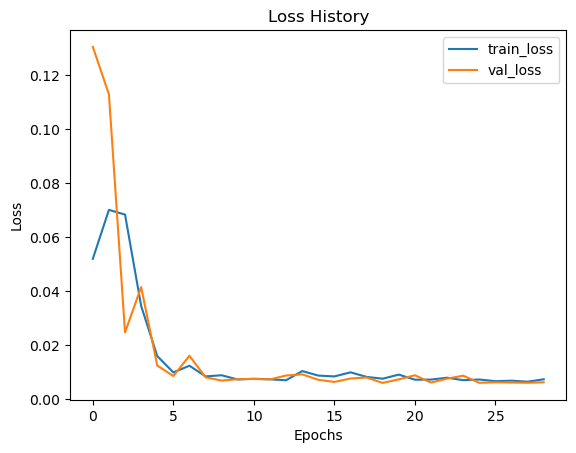

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

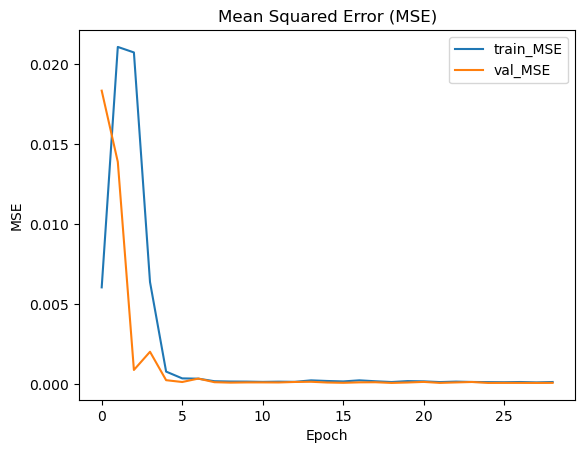

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

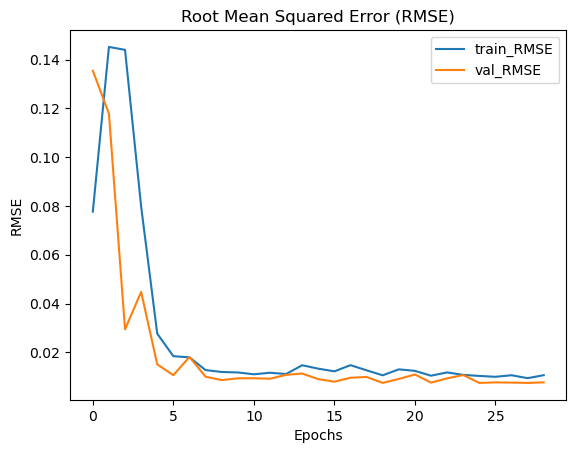

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

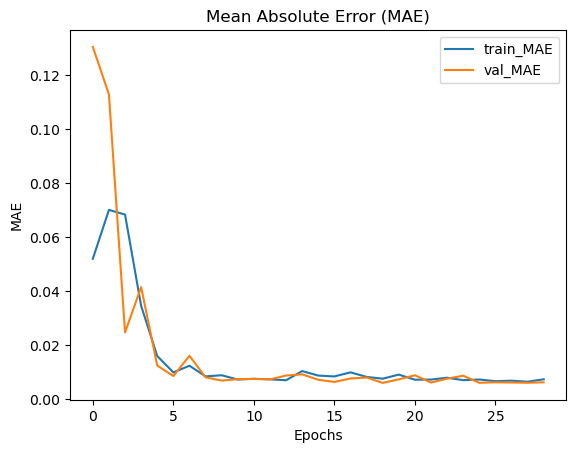

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

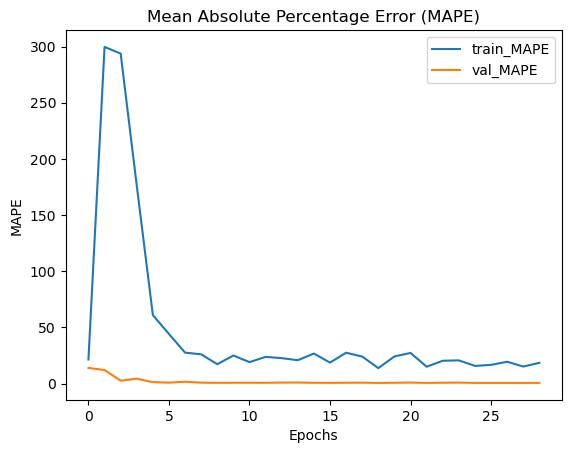

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:16:02.797023: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


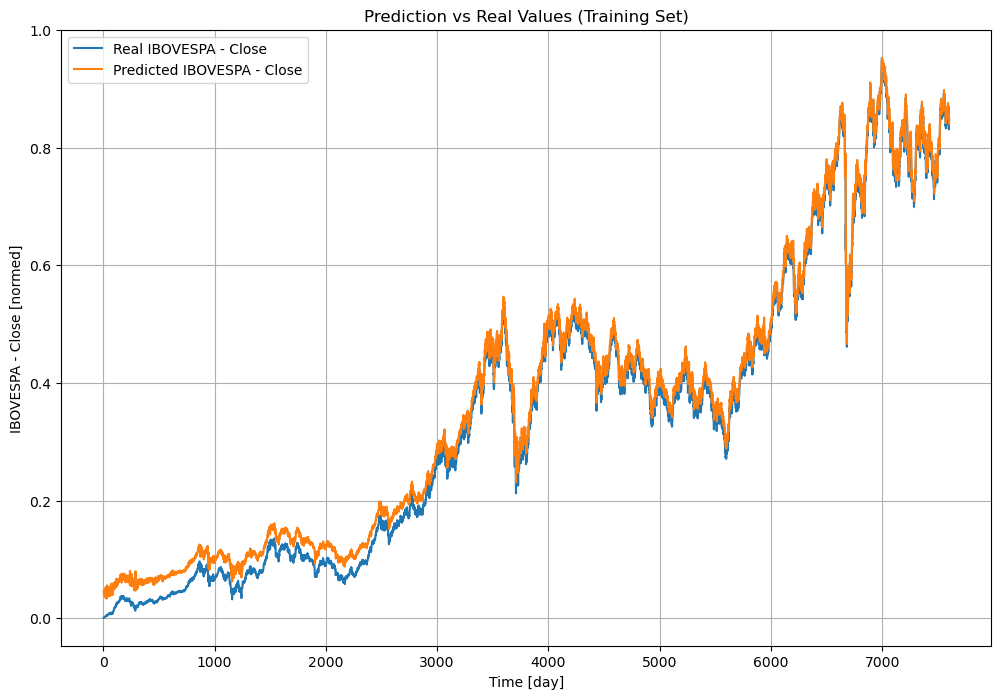

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


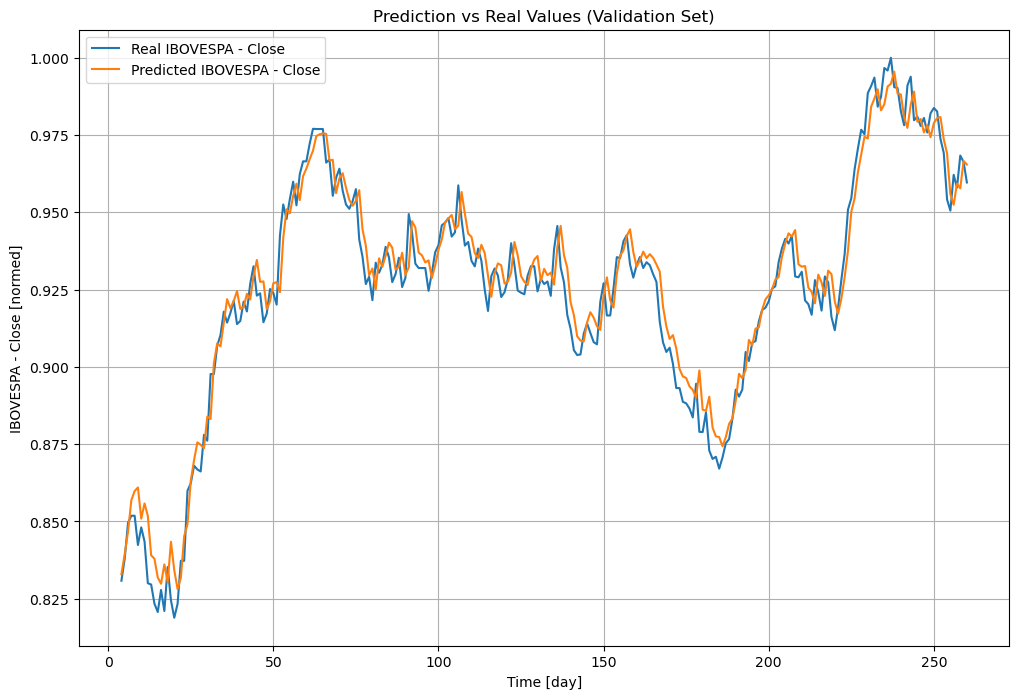

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


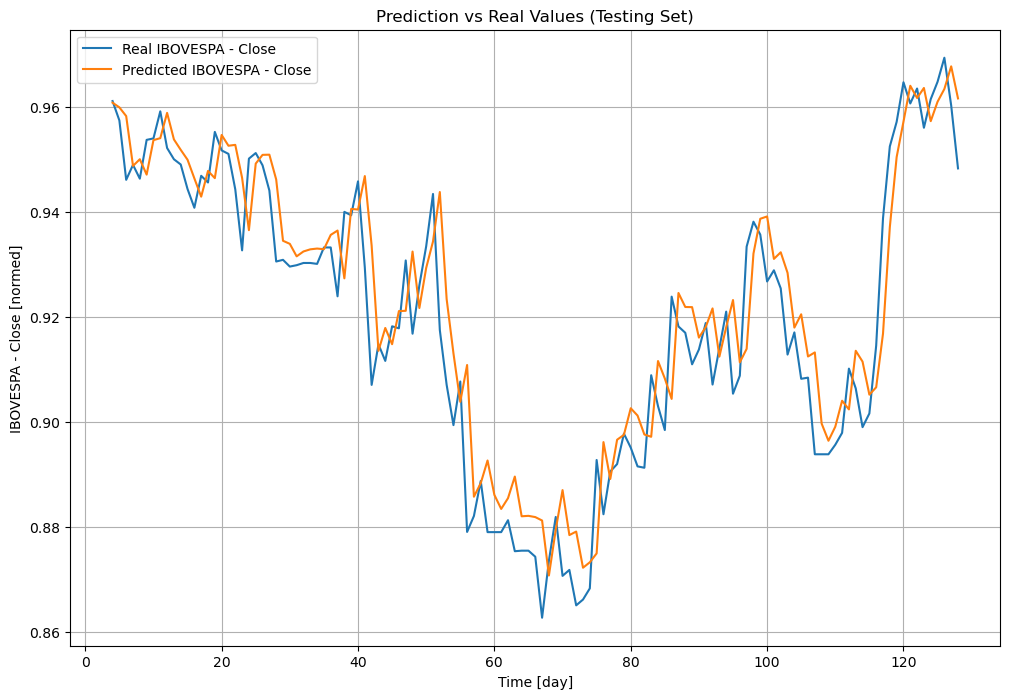

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

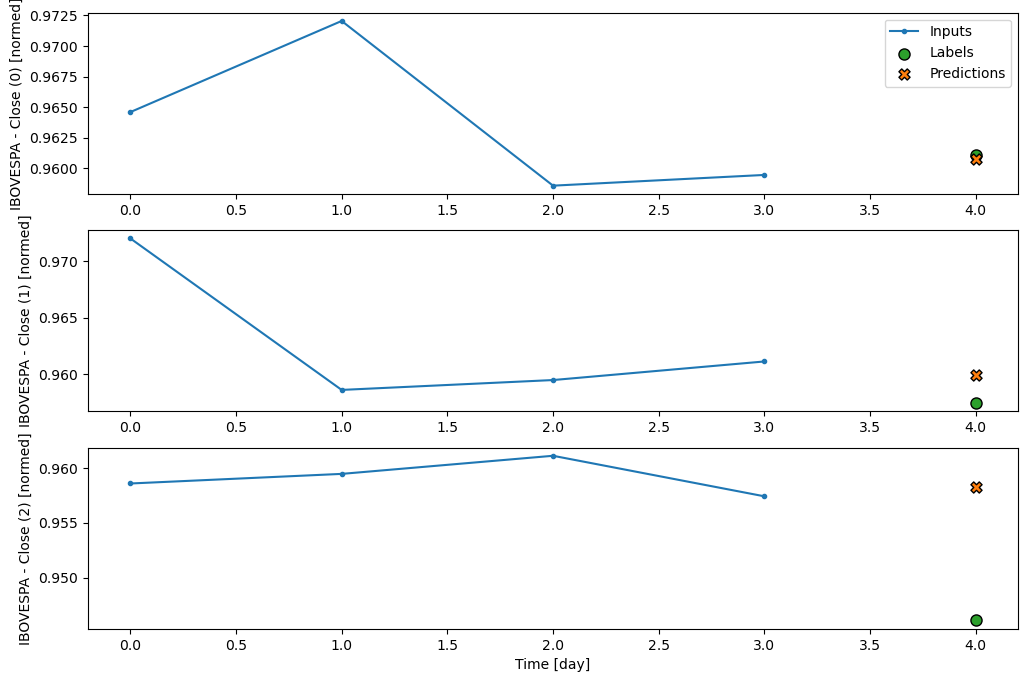

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:5s:171ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[[0.9608019 , 0.9608019 , 0.9608019 , ..., 0.9608019 ,
         0.9608019 , 0.9608019 ]],

       [[0.95990944, 0.95990944, 0.95990944, ..., 0.95990944,
         0.95990944, 0.95990944]],

       [[0.9582514 , 0.9582514 , 0.9582514 , ..., 0.9582514 ,
         0.9582514 , 0.9582514 ]],

       ...,

       [[0.96341765, 0.96341765, 0.96341765, ..., 0.96341765,
         0.96341765, 0.96341765]],

       [[0.96772856, 0.96772856, 0.96772856, ..., 0.96772856,
         0.96772856, 0.96772856]],

       [[0.9616122 , 0.9616122 , 0.9616122 , ..., 0.9616122 ,
         0.9616122 , 0.9616122 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')